# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read (.csv) File from Google Drive




In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/games_sales.csv')

Mounted at /content/gdrive


# Dataset games_sales.csv

In [3]:
print(df)

                                     Name  Sales          Series    Release  \
0           PlayerUnknown's Battlegrounds   42.0             NaN  12/1/2017   
1                               Minecraft   33.0       Minecraft  11/1/2011   
2                              Diablo III   20.0          Diablo   5/1/2012   
3                             Garry's Mod   20.0             NaN  11/1/2006   
4                                Terraria   17.2             NaN   5/1/2011   
..                                    ...    ...             ...        ...   
172        Who Wants to Be a Millionaire?    1.0             NaN  11/1/1999   
173  Wing Commander 3: Heart of the Tiger    1.0  Wing Commander  12/1/1994   
174                            Zoo Tycoon    1.0      Zoo Tycoon  10/1/2001   
175      StarCraft II: Heart of the Swarm    1.0       StarCraft   3/1/2013   
176      StarCraft II: Legacy of the Void    1.0       StarCraft  11/1/2015   

                       Genre               Develope

# Data Preprocessing
Check for missing value and remove duplicate rows. If you look at the context, the "Series" column means whether the game has another sequel or not. If not, then it won't be a problem if the value is Null.


In [13]:
df['Release'] = pd.to_datetime(df['Release'])
df = df.drop_duplicates()
df_missing_value = df.isna().sum()
print(df.info())
print("Missing Value: \n", df_missing_value)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB
None
Missing Value: 
 Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64


# Finding oldest and newest game
There are 2 ways that i can figure,
1. Using .iloc and .argmin or .argmax
2. Set the index on 'Release' column then sort

In [6]:
oldest_game = df.iloc[df['Release'].argmin()]
newest_game = df.iloc[df['Release'].argmax()]
df_sort = df.set_index('Release').sort_index()

print(oldest_game)
print(newest_game)
print(df_sort)

Name                                       Hydlide
Sales                                          1.0
Series                                     Hydlide
Release                        1984-12-01 00:00:00
Genre                          Action role-playing
Developer    Technology and Entertainment Software
Publisher    Technology and Entertainment Software
Name: 133, dtype: object
Name                         Valheim
Sales                            6.0
Series                           NaN
Release          2021-02-01 00:00:00
Genre                       Survival
Developer                  Iron Gate
Publisher    Coffee Stain Publishing
Name: 20, dtype: object
                                              Name  Sales  \
Release                                                     
1984-12-01                                 Hydlide    1.0   
1985-06-01  Where in the World Is Carmen Sandiego?    4.0   
1985-11-01                    International Karate    1.5   
1988-01-01                    

# Find publisher who published most of the games?


Electronic Arts            19
Blizzard Entertainment      8
Paradox Interactive         7
Activision                  6
GT Interactive              5
Gathering of Developers     4
Microsoft                   4
Capcom                      4
Virgin Interactive          3
CD Projekt                  3
Name: Publisher, dtype: int64


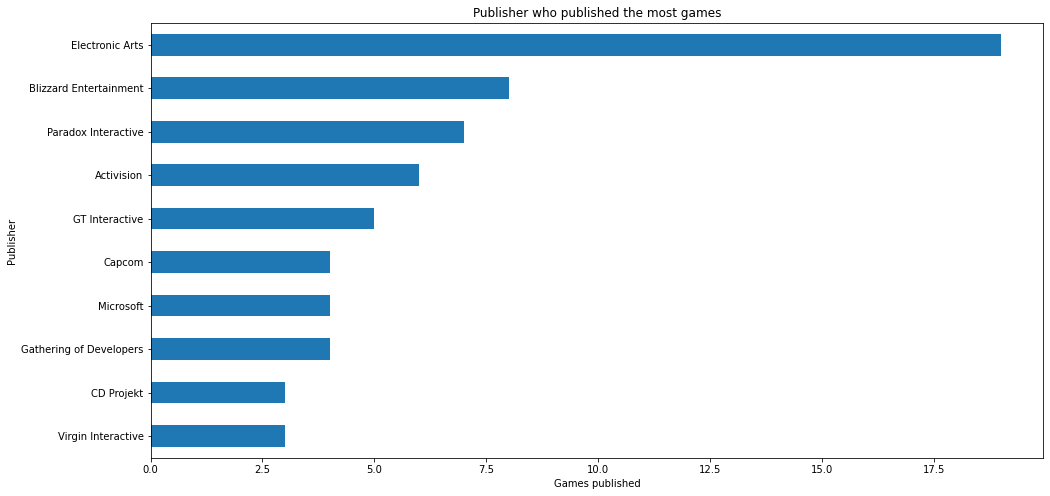

In [8]:
publisher_count = df['Publisher'].value_counts()
print(publisher_count.head(10))
publisher_count.head(10).sort_values().plot(kind='barh', figsize=(16,8))
plt.title("Publisher who published the most games")
plt.ylabel("Publisher")
plt.xlabel("Games published")
plt.show()

# Find developer who developed most of the games 

Blizzard Entertainment        8
Maxis                         6
Paradox Development Studio    5
id Software                   4
Westwood Studios              4
Capcom                        4
Ensemble Studios              4
CD Projekt Red                4
Valve                         4
Illusion Softworks            3
Name: Developer, dtype: int64


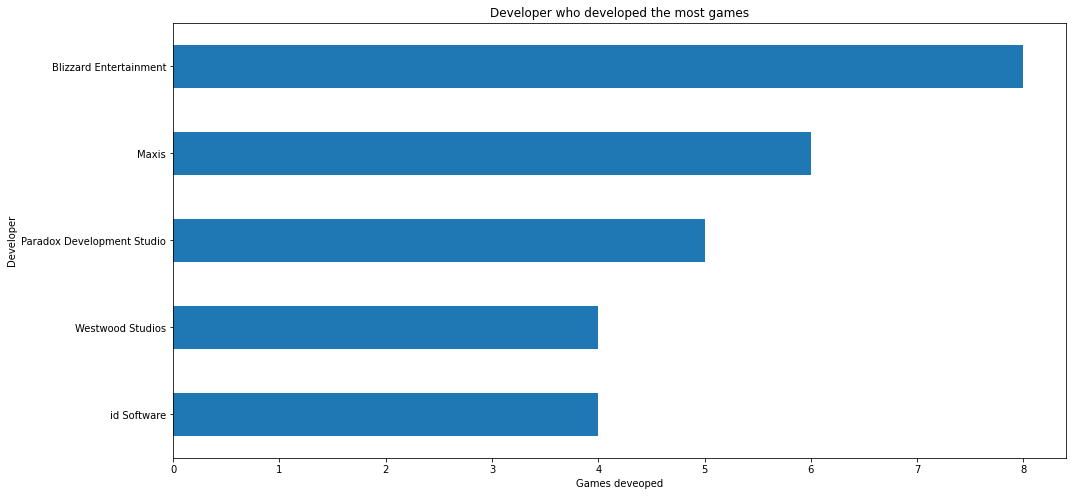

In [10]:
developer_count = df['Developer'].value_counts()
print(developer_count.head(10))
developer_count.head(5).sort_values().plot(kind='barh', figsize=(16,8))
plt.title("Developer who developed the most games")
plt.ylabel("Developer")
plt.xlabel("Games deveoped")
plt.show()

# Find series that had the most sales ?


                        Series  Sales
47                   Minecraft   33.0
22                      Diablo   26.0
75                    The Sims   24.0
36                   Half-Life   21.0
85                    Warcraft   19.0
..                         ...    ...
60                     RoboCop    1.0
46  Microsoft Flight Simulator    1.0
58             Railroad Tycoon    1.0
56                 Psychonauts    1.0
90                        Zork    1.0

[91 rows x 2 columns]


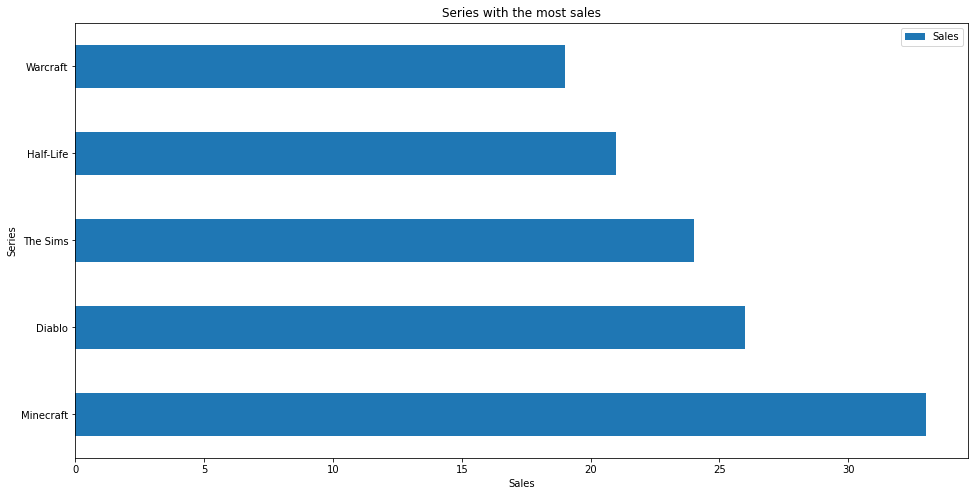

In [11]:
series_sales = df.groupby('Series')['Sales'].sum().reset_index()
print(series_sales.sort_values(['Sales'], ascending=False))
series_sales.sort_values(['Sales'], ascending=False).head().plot(kind='barh', y='Sales', x='Series', figsize=(16,8))
plt.title("Series with the most sales")
plt.xlabel("Sales")
plt.show()

# Series that had the most games

Command & Conquer        5
StarCraft                4
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64


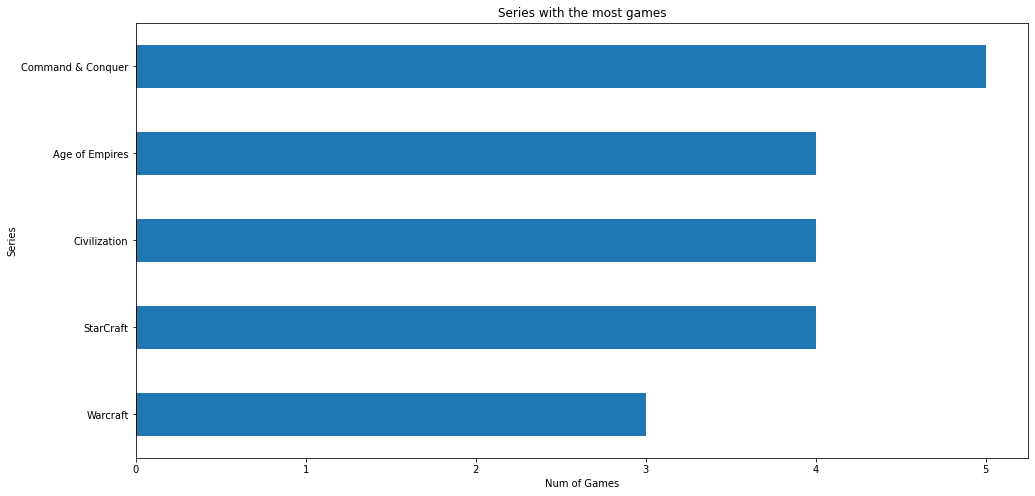

In [12]:
series_count =  df['Series'].value_counts()
print(series_count)
series_count.head().sort_values().plot(kind='barh', figsize=(16,8))
plt.title("Series with the most games")
plt.xlabel("Num of Games")
plt.ylabel("Series")
plt.show()